In [1]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import psycopg2
print("psycopg2 is working!")

psycopg2 is working!


In [3]:
import psycopg2
import pandas as pd

# Database credentials
DB_NAME = "Payment_Discrepancy_Resolution_System"
DB_USER = "postgres" 
DB_PASSWORD = "Manu@1999" 
DB_HOST = "localhost"
DB_PORT = "5432"

try:
    conn = psycopg2.connect(
        dbname=DB_NAME, user=DB_USER, password=DB_PASSWORD, host=DB_HOST, port=DB_PORT
    )
    print("Database connection successful!")

    query = """
        SELECT i.invoice_id, i.customer_name, 
               i.amount AS invoice_amount, 
               COALESCE(SUM(p.amount), 0) AS total_paid, 
               (i.amount - COALESCE(SUM(p.amount), 0)) AS discrepancy
        FROM Invoices i
        LEFT JOIN Payments p ON i.invoice_id = p.invoice_id
        GROUP BY i.invoice_id, i.amount
        HAVING i.amount != COALESCE(SUM(p.amount), 0);
    """

    df = pd.read_sql(query, conn)

    df.to_csv("discrepancy_report.csv", index=False)

    print("\nDiscrepancy Report:")
    print(df)

except Exception as e:
    print(f"Error: {e}")

finally:
    if 'conn' in locals():
        conn.close()
        print("Database connection closed.")


Database connection successful!

Discrepancy Report:
     invoice_id customer_name  invoice_amount  total_paid  discrepancy
0          1560         Zooxo            18.0        20.0         -2.0
1          1587      Gigaclub            99.0        90.0          9.0
2          1128  Jabbersphere            92.4        84.0          8.4
3          1691         Meemm            59.4        66.0         -6.6
4          1136         Quaxo            52.2        58.0         -5.8
..          ...           ...             ...         ...          ...
189        1760     Flashspan            11.7        13.0         -1.3
190        1288      Zoomzone            53.1        59.0         -5.9
191        1839       Tagtune            50.6        46.0          4.6
192        1659       Feedmix            60.3        67.0         -6.7
193        1014         Mydeo            16.2        18.0         -1.8

[194 rows x 5 columns]
Database connection closed.


C:\Users\USER\AppData\Local\Temp\ipykernel_13764\4250879301.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df.head())

   invoice_id customer_name  invoice_amount  total_paid  discrepancy
0        1560         Zooxo            18.0        20.0         -2.0
1        1587      Gigaclub            99.0        90.0          9.0
2        1128  Jabbersphere            92.4        84.0          8.4
3        1691         Meemm            59.4        66.0         -6.6
4        1136         Quaxo            52.2        58.0         -5.8


In [6]:
# Basic statistics of discrepancies
summary_stats = df['discrepancy'].describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
 count     194.000000
mean      146.345876
std       716.184313
min      -650.000000
25%        -5.200000
50%        -0.250000
75%         6.200000
max      5094.600000
Name: discrepancy, dtype: float64


In [7]:
# Sort discrepancies in ascending order to get the most underpaid invoices
top_underpaid = df.nsmallest(10, 'discrepancy')
print("\nTop 10 Underpaid Invoices:\n", top_underpaid)

# Sort discrepancies in descending order to get the most overpaid invoices
top_overpaid = df.nlargest(10, 'discrepancy')
print("\nTop 10 Overpaid Invoices:\n", top_overpaid)


Top 10 Underpaid Invoices:
      invoice_id customer_name  invoice_amount  total_paid  discrepancy
83         1863         Eadel          5850.0      6500.0       -650.0
115        1231       Yakitri          5850.0      6500.0       -650.0
179        1448        Vinder          5850.0      6500.0       -650.0
29         1845        Devbug          1120.5      1245.0       -124.5
50         1574         Npath          1110.6      1234.0       -123.4
95         1612         Voomm            90.0       100.0        -10.0
13         1004       Youspan            89.1        99.0         -9.9
182        1068       Bluejam            88.2        98.0         -9.8
11         1742      Fliptune            86.4        96.0         -9.6
138        1801     Gigashots            86.4        96.0         -9.6

Top 10 Overpaid Invoices:
      invoice_id customer_name  invoice_amount  total_paid  discrepancy
76         1205       Teklist         30567.6     25473.0       5094.6
40         1022     

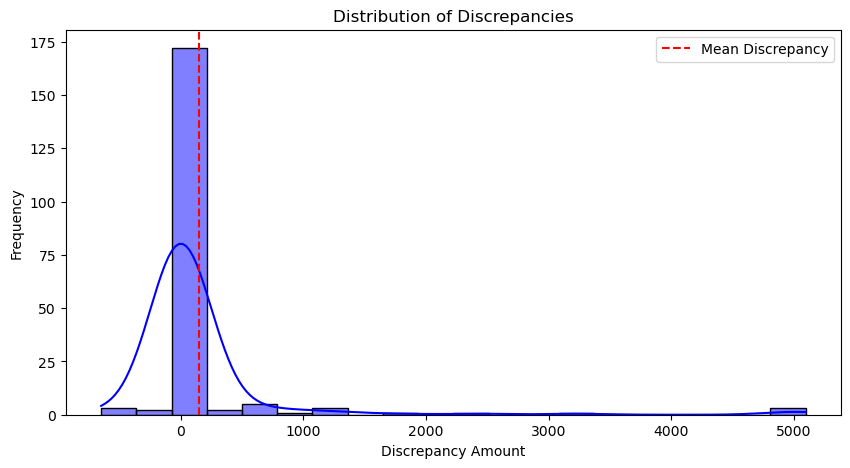

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['discrepancy'], bins=20, kde=True, color='blue')
plt.axvline(df['discrepancy'].mean(), color='red', linestyle='dashed', label="Mean Discrepancy")
plt.xlabel("Discrepancy Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Discrepancies")
plt.legend()
plt.show()

In [9]:
# Count the number of discrepancies per customer
customer_discrepancies = df.groupby("customer_name")['discrepancy'].count().reset_index()
customer_discrepancies = customer_discrepancies.sort_values(by="discrepancy", ascending=False)

# Display top 10 customers with most discrepancies
print("\nTop 10 Customers with Most Discrepancies:\n", customer_discrepancies.head(10))



Top 10 Customers with Most Discrepancies:
     customer_name  discrepancy
59       Kanoodle           12
89          Quire            4
25         Devbug            3
31        Dynabox            3
18       Centidel            3
102        Skimia            3
39     Fivebridge            2
57       Jetpulse            2
87          Quimm            2
86          Quaxo            2


C:\Users\USER\AppData\Local\Temp\ipykernel_13764\1489628083.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_discrepancies.head(10), x='customer_name', y='discrepancy', palette="viridis")


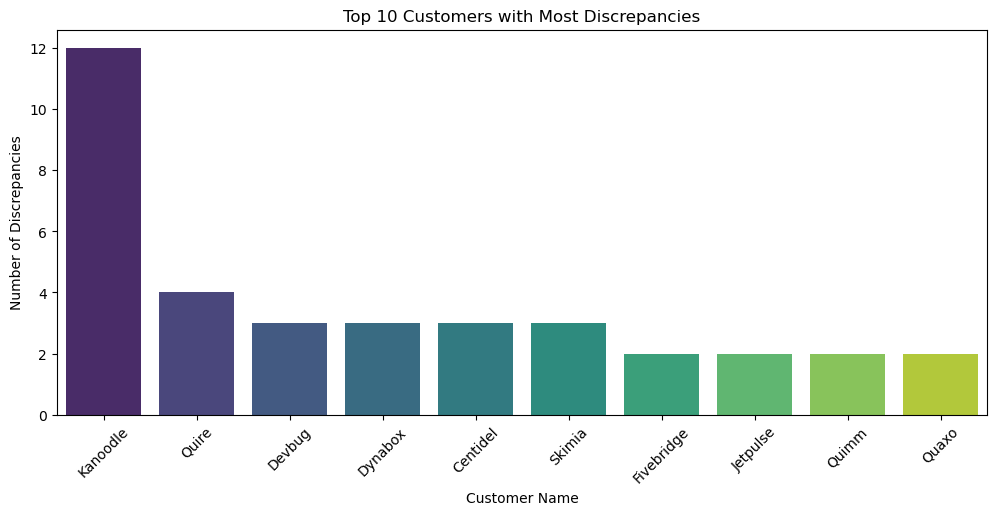

In [10]:
# Plot top 10 customers with most discrepancies
plt.figure(figsize=(12, 5))
sns.barplot(data=customer_discrepancies.head(10), x='customer_name', y='discrepancy', palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Customer Name")
plt.ylabel("Number of Discrepancies")
plt.title("Top 10 Customers with Most Discrepancies")
plt.show()

In [11]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [12]:
df.to_excel("Discrepancy_Report1.xlsx", index=False)
print("Discrepancy report saved!")

Discrepancy report saved!


In [16]:
import smtplib
import os
from email.message import EmailMessage

def send_email_alert(discrepancy_count):
    sender_email = "toreachmanojn@outlook.com"  
    sender_password = "vdmoeroixftzkvqj"
    receiver_email = "24154100008@manipalacademyonline.edu.in"

    subject = "🚨 Payment Discrepancy Alert"
    body = f"ALERT: {discrepancy_count} invoice-payment mismatches detected.\nPlease review the attached report."

    msg = EmailMessage()
    msg["Subject"] = subject
    msg["From"] = sender_email
    msg["To"] = receiver_email
    msg.set_content(body)

    try:
        with smtplib.SMTP("smtp.office365.com", 587) as server:
            server.starttls()
            server.login(sender_email, sender_password)
            server.send_message(msg)
        print("✅ Email alert sent successfully!")
    except Exception as e:
        print(f"❌ Error sending email: {e}")

# Check if discrepancies exist before sending email
if not df.empty:
    send_email_alert(len(df))

❌ Error sending email: (535, b'5.7.139 Authentication unsuccessful, basic authentication is disabled. [MAXPR01CA0104.INDPRD01.PROD.OUTLOOK.COM 2025-02-28T21:43:21.631Z 08DD5814B9460303]')


In [20]:
import smtplib

def send_email_alert(discrepancy_count):
    sender_email = "toreachmanojn@gmail.com"
    receiver_email = "toreachmanojn@outlook.com"
    app_password = "ubdxgapunlkeiqhh" 
    
    subject = "Payment Discrepancy Alert"
    body = f"ALERT: {discrepancy_count} invoice-payment mismatches detected. Check the attached report."
    message = f"Subject: {subject}\n\n{body}"

    try:
        with smtplib.SMTP("smtp.gmail.com", 587) as server:
            server.starttls()
            server.login(sender_email, app_password)
            server.sendmail(sender_email, receiver_email, message)
        print("✅ Email sent successfully!")
    except Exception as e:
        print(f"❌ Error sending email: {e}")

# Test sending email
send_email_alert(5)

✅ Email sent successfully!


In [21]:
import smtplib
import ssl
import os
from email.message import EmailMessage

# Email configuration
SMTP_SERVER = "smtp.gmail.com"  
SMTP_PORT = 587
SENDER_EMAIL = "toreachmanojn@gmail.com"
SENDER_PASSWORD = "ubdxgapunlkeiqhh"
RECEIVER_EMAIL = "toreachmanojn@outlook.com"
FILE_PATH = "Discrepancy_Report.xlsx"

def send_email_with_attachment():
    msg = EmailMessage()
    msg["Subject"] = "Payment Discrepancy Report"
    msg["From"] = SENDER_EMAIL
    msg["To"] = RECEIVER_EMAIL
    msg.set_content("Please find the attached discrepancy report for review.")

    # Attach the file
    with open(FILE_PATH, "rb") as file:
        msg.add_attachment(file.read(), maintype="application", subtype="vnd.ms-excel", filename=os.path.basename(FILE_PATH))

    # Send email
    context = ssl.create_default_context()
    with smtplib.SMTP(SMTP_SERVER, SMTP_PORT) as server:
        server.starttls(context=context)
        server.login(SENDER_EMAIL, SENDER_PASSWORD)
        server.send_message(msg)
    
    print("✅ Email with attachment sent successfully!")

# Call the function to send the email
send_email_with_attachment()

✅ Email with attachment sent successfully!


In [24]:
pip install streamlit pandas openpyxl matplotlib seaborn

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -------- ------------------------------- 2.1/9.6 MB 11.7 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.6 MB 11.7 MB/s eta 0:00:01
   ---------------------------- ----------- 6.8/9.6 MB 11.6 MB/s eta 0:00:01
   ------------------------------------- -- 8.9/9.6 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/731.2 kB ? eta -:--:--
   ---------------------------------------- 731.2/731.2 kB 7.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
   --- ------------------------------------ 2.4/25.3 MB 11.2 MB/s eta 0:00:03
   ------- ------

In [7]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
@st.cache_data
def load_data():
    return pd.read_csv("discrepancy_report.csv")

df = load_data()

# Title
st.title("📊 Payment Discrepancy Dashboard")

# Sidebar Filters
st.sidebar.header("🔍 Filter Options")
customer_filter = st.sidebar.multiselect("Select Customer:", df["customer_name"].unique())
date_filter = st.sidebar.date_input("Select Date Range:", [])
amount_filter = st.sidebar.slider("Discrepancy Amount Range:", float(df["discrepancy"].min()), float(df["discrepancy"].max()))

# Apply Filters
filtered_df = df.copy()
if customer_filter:
    filtered_df = filtered_df[filtered_df["customer_name"].isin(customer_filter)]
if date_filter:
    filtered_df = filtered_df[pd.to_datetime(filtered_df["date"]) >= pd.to_datetime(date_filter[0])]
if amount_filter:
    filtered_df = filtered_df[filtered_df["discrepancy"] <= amount_filter]

# Display Data
st.subheader("Filtered Discrepancies")
st.dataframe(filtered_df)

# Download Reports
st.sidebar.markdown("### 📥 Download Reports")
csv = filtered_df.to_csv(index=False).encode("utf-8")
st.sidebar.download_button("Download CSV", csv, "filtered_discrepancies.csv", "text/csv")

excel = filtered_df.to_excel("filtered_discrepancies.xlsx", index=False)
st.sidebar.download_button("Download Excel", "filtered_discrepancies.xlsx")

# Visualization
st.subheader("📊 Discrepancy Analysis")
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=filtered_df, x="discrepancy", y="customer_name", palette="coolwarm", ax=ax)
st.pyplot(fig)

2025-03-01 03:35:27.241 No runtime found, using MemoryCacheStorageManager
2025-03-01 03:35:27.241 No runtime found, using MemoryCacheStorageManager
2025-03-01 03:35:27.241 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 03:35:27.241 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 03:35:27.241 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 03:35:27.260 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 03:35:27.261 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 03:35:27.262 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 03:35:27.263 Thread 'MainThread': missing ScriptRunContext! This warning can be ignor

DeltaGenerator()

In [8]:
streamlit run app.py

SyntaxError: invalid syntax (3737097518.py, line 1)